In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

<IPython.core.display.Javascript object>

# Reading the datasets

## Reading the global dataset

In [3]:
df = pd.read_csv("../../../../data/interim/Global-Dataset/global_dataset.csv")

<IPython.core.display.Javascript object>

## Reading the local dataset for plant AY

In [4]:
df_ab = pd.read_csv("../../../../data/processed/204/ab.csv")

<IPython.core.display.Javascript object>

# Preprocessing of Global Dataset

### Removing the plant to be fine-tuned

In [5]:
df.shape

(66111, 48)

<IPython.core.display.Javascript object>

In [6]:
df = df[df["Factory_Plant"] != "204_AB"].reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df.shape

(63795, 48)

<IPython.core.display.Javascript object>

### Removing non-matching columns between the datasets

In [8]:
df = df[df_ab.columns.to_list() + ["Factory_Plant"]]

<IPython.core.display.Javascript object>

In [9]:
df.shape

(63795, 17)

<IPython.core.display.Javascript object>

## Removing missing features

In [10]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
CS1,52.112235
#325,12.375578
Na2O,11.773650
K2O,9.372208
CS3,6.345325
Initial setting time,4.385924
#200,4.291872
MgO,3.150717
Final setting time,1.235207
SO3,1.017321


<IPython.core.display.Javascript object>

<Axes: >

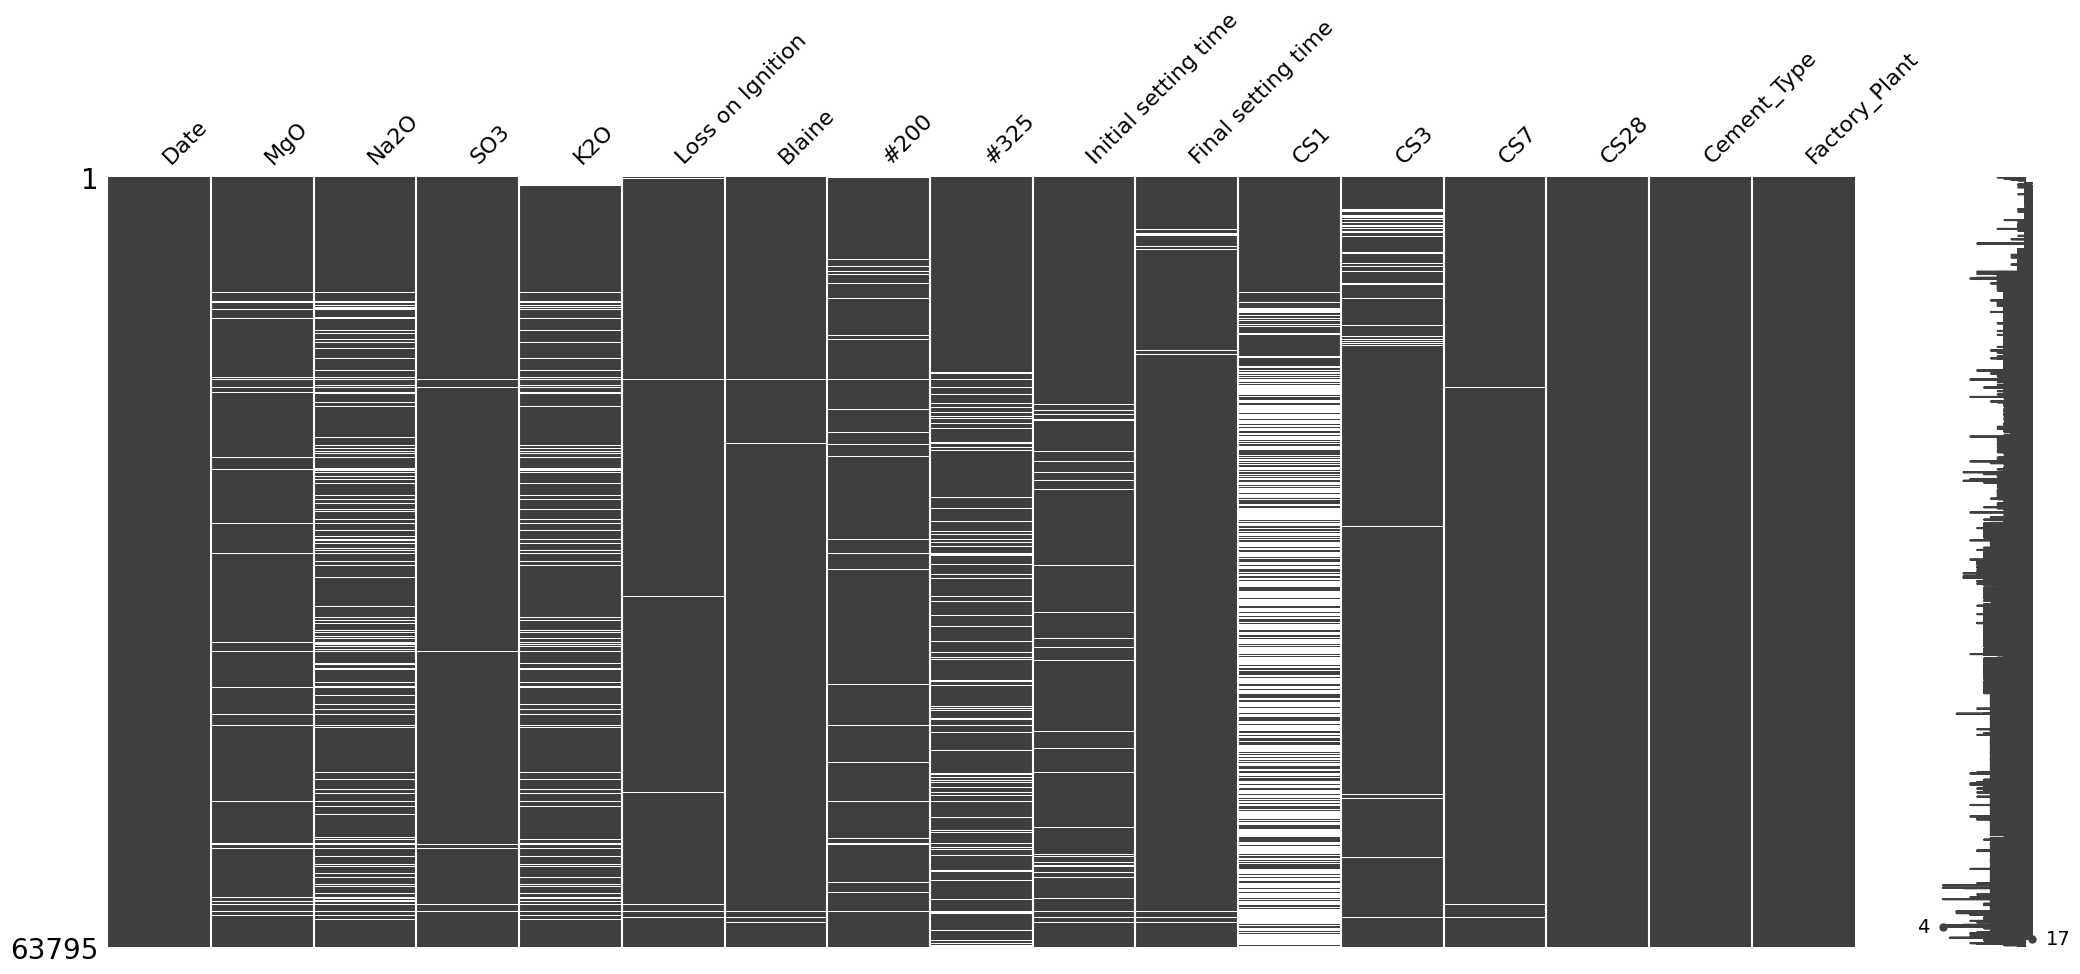

<IPython.core.display.Javascript object>

In [11]:
msno.matrix(df)

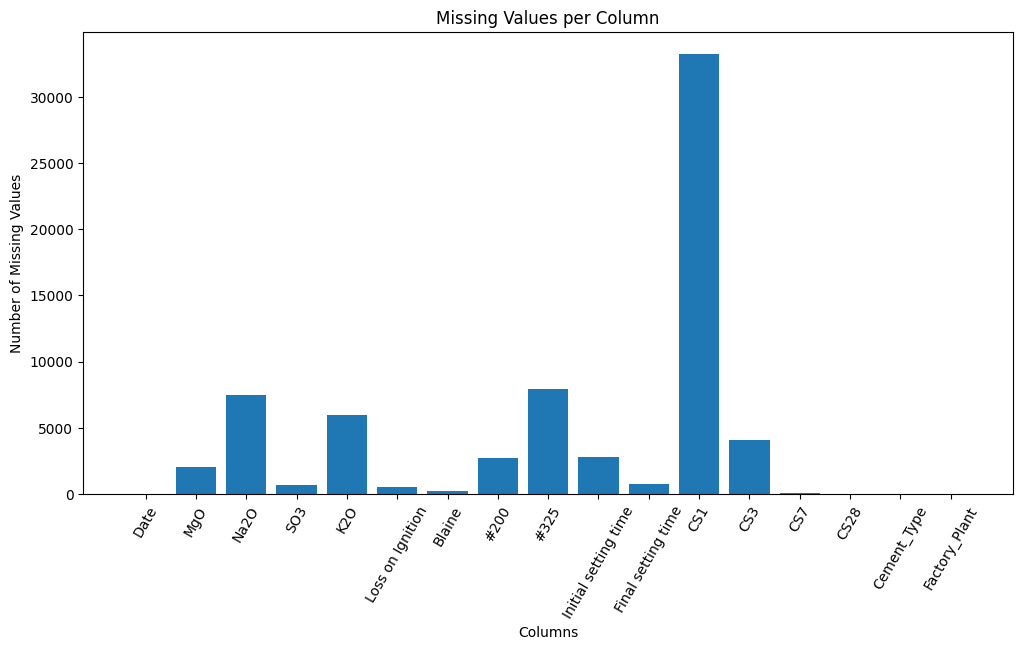

<IPython.core.display.Javascript object>

In [12]:
missing_counts = df.isnull().sum()
plt.figure(figsize=(12, 6))
plt.bar(missing_counts.index, missing_counts.values)
plt.xticks(rotation=60)
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.title("Missing Values per Column")
plt.show()

### Removing features with many zeros when applicable

In [13]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for Global Dataset")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for Global Dataset")
zero_percentages.style.background_gradient(cmap="Reds")

,Zero (%) for Global Dataset
#200,14.433733
Na2O,1.649032
#325,0.355827
Loss on Ignition,0.100321
Blaine,0.095619
Initial setting time,0.086214
Final setting time,0.084646
SO3,0.064268
MgO,0.021945
K2O,0.012540


<IPython.core.display.Javascript object>

### Drop rows where the target variable is null

In [14]:
df = df[df["CS28"].notna()]

<IPython.core.display.Javascript object>

### Dropping rows where the target variable is zero

In [15]:
df = df[~df["CS28"].eq(0)]

<IPython.core.display.Javascript object>

### Dropping rows where any other variable has a zero value - except #200

In [16]:
for col in df.columns:
    if col != "#200" and col != "#325":
        df = df[~df[col].eq(0)]

<IPython.core.display.Javascript object>

In [17]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

,Missing (%)
CS1,52.712485
#325,12.486218
Na2O,11.896582
K2O,9.494895
CS3,6.460427
Initial setting time,4.459820
#200,4.293635
MgO,3.154312
Final setting time,1.241591
SO3,1.035458


<IPython.core.display.Javascript object>

<Axes: >

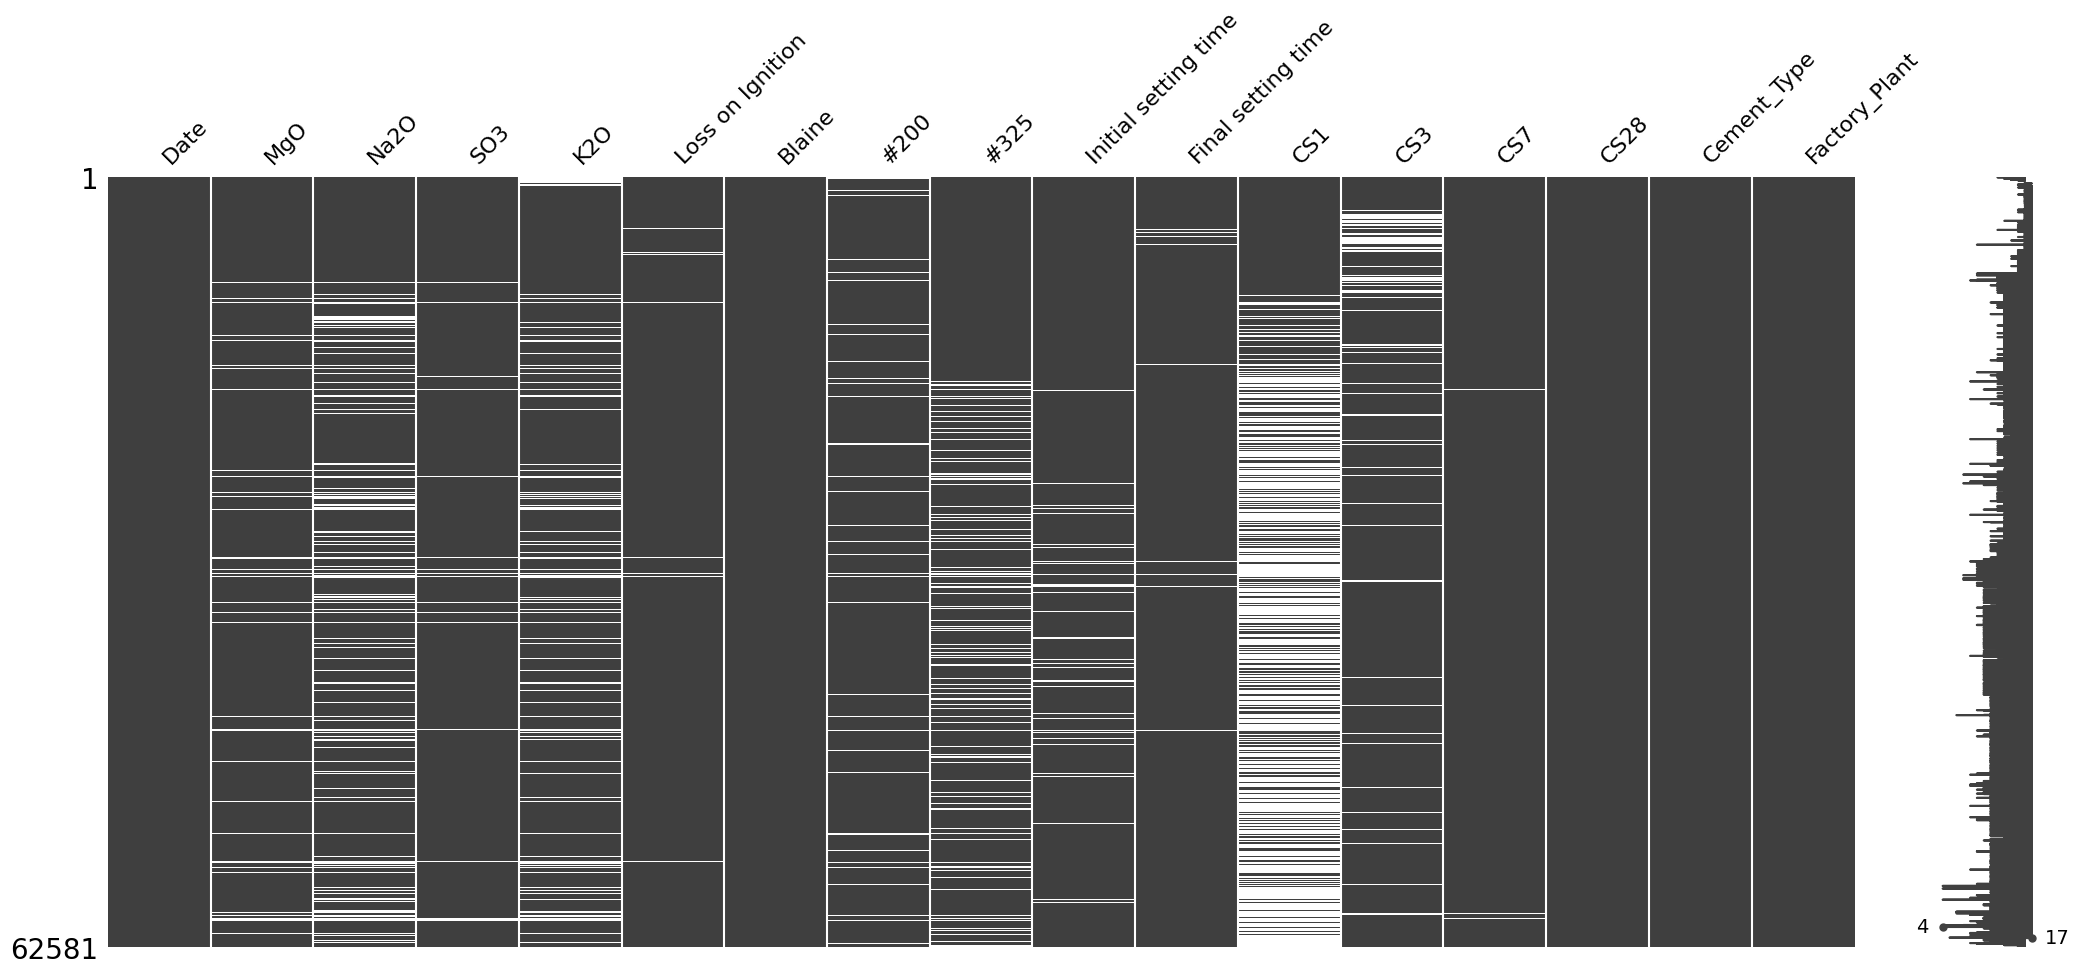

<IPython.core.display.Javascript object>

In [18]:
msno.matrix(df)

In [19]:
zero_values = {}
for col in df.select_dtypes(include="number").columns:
    zero_percentages = (df[df[col].eq(0)].shape[0] / df.shape[0]) * 100
    zero_values[col] = zero_percentages

zero_percentages = pd.Series(zero_values, name=f"Zero (%) for Global Dataset")
zero_percentages = zero_percentages.sort_values(ascending=False)
zero_percentages = zero_percentages.to_frame(name=f"Zero (%) for Global Dataset")
zero_percentages.style.background_gradient(cmap="Reds")

,Zero (%) for Global Dataset
#200,14.517186
#325,0.356338
MgO,0.000000
Na2O,0.000000
SO3,0.000000
K2O,0.000000
Loss on Ignition,0.000000
Blaine,0.000000
Initial setting time,0.000000
Final setting time,0.000000


<IPython.core.display.Javascript object>

In [20]:
df.shape

(62581, 17)

<IPython.core.display.Javascript object>

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62581 entries, 0 to 63794
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  62581 non-null  object 
 1   MgO                   60607 non-null  float64
 2   Na2O                  55136 non-null  float64
 3   SO3                   61933 non-null  float64
 4   K2O                   56639 non-null  float64
 5   Loss on Ignition      62109 non-null  float64
 6   Blaine                62388 non-null  float64
 7   #200                  59894 non-null  float64
 8   #325                  54767 non-null  float64
 9   Initial setting time  59790 non-null  float64
 10  Final setting time    61804 non-null  float64
 11  CS1                   29593 non-null  float64
 12  CS3                   58538 non-null  float64
 13  CS7                   62495 non-null  float64
 14  CS28                  62581 non-null  float64
 15  Cement_Type           62

<IPython.core.display.Javascript object>

### Sort the dataset by date

In [22]:
df["Date"] = pd.to_datetime(df["Date"])

<IPython.core.display.Javascript object>

In [23]:
df = df.sort_values(by="Date")

<IPython.core.display.Javascript object>

## Saving the dataset

<h3>Saving for feature engineering</h3>

In [24]:
df.to_csv("../../../../data/interim/204/global_ab.csv", index=False)

<IPython.core.display.Javascript object>